# Домашее задание №5

В файле advertising.csv содержаться данные о клиентах интернет-магазина.

Набор данных содержит следующие переменные:

    'Daily Time Spent on Site': consumer time on site in minutes
    'Age': cutomer age in years
    'Area Income': Avg. Income of geographical area of consumer
    'Daily Internet Usage': Avg. minutes a day consumer is on the internet
    'Ad Topic Line': Headline of the advertisement
    'City': City of consumer
    'Male': Whether or not consumer was male
    'Country': Country of consumer
    'Timestamp': Time at which consumer clicked on Ad or closed window
    'Clicked on Ad': 0 or 1 indicated clicking on Ad


Задача - создать модель, которая будет предсказывать, нажмет ли интернет-пользователь на рекламу, на основе характеристик этого пользователя.

Задания:

    •	Сформулируйте гипотезы исследования.
    •	Постройте модель бинарной логистической регрессии. Зависимая переменная - 'Clicked on Ad'. В качестве предикторов выберите не менее 3 метрических переменных и не менее 2 категориальных переменных.
    •	Напишите уравнение регрессии (линейная часть). Оцените характеристики регрессионной модели. Оцените статическую значимость и предсказательную силу модели.
    •	Оцените значимость регрессионных коэффициентов. Подробно интерпретируйте особенности взаимосвязи между каждым из предикторов и зависимой переменной.
    •	Проведите диагностику модели (проверьте остатки на нормальность, оцените мультиколлинартность).
    •	Осуществите кросс-валидацию и опишите ее результаты.
    •	Сформулируйте общие содержательные выводы по результатам регрессионного анализа данных. Какие результаты анализа данных для вас оказались очевидными, а какие неожиданными?

Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!


H1: Возраст пользователя влияет на вероятность нажатия на рекламу. (подтвердилась)

H2: Время проведенное на сайте как-то положительно связано с вероятностью нажатия на рекламу. (не подтвердилась)

Н3: Средний доход по географической области влияет на вероятность нажатия на рекламу. (не подтвердилась)

Н4: Пользователи, проводящие больше времени в интернете (Daily Internet Usage), имеют более высокую вероятность нажатия на рекламу. (не подтвердилась)

Н5: Пол пользователя не влияет на вероятность нажатия на рекламу. (подтвердилась)

Н6: Страна пользователя может иметь влияние на вероятность нажатия на рекламу. (в итоге не использовала эту переменную)

Н7: При отсутвии других факторов высокая вероятность нажатия на рекламу. (подтвердилась)

# Бинарная логистическая регрессия

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('advertising.csv')

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info() # информация полная по всем переменным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [ ]:
# Названия переменных, сгруппированные по типам данных
for t in df.dtypes.unique():
     print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: float64
['Daily Time Spent on Site' 'Area Income' 'Daily Internet Usage']

Type: int64
['Age' 'Male' 'Clicked on Ad']

Type: object
['Ad Topic Line' 'City' 'Country' 'Timestamp']



In [ ]:
#Процент пропущенных значений по переменным, содержащим пропуски
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Процент пропущенных значений' : missing})
missing # нет пропущенных значений

,Процент пропущенных значений


### Зависимая переменная

In [ ]:
df['Clicked on Ad'].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

### Предикторы

Метрические переменные:

'Daily Time Spent on Site' (время, проведенное на сайте)

'Age' (возраст)

'Area Income' (средний доход)

'Daily Internet Usage' (ежедневное время в интернете)

Категориальные переменные:

'Male' (пол)

'Country' (страна)

In [ ]:
df['Male'].value_counts()

Male
0    519
1    481
Name: count, dtype: int64

In [ ]:
df['Sex'] = np.where(df['Male'] == 1, 'male', 'female')


print(df[['Male', 'Sex']].head())

   Male     Sex
0     0  female
1     1    male
2     0  female
3     1    male
4     0  female


In [ ]:
df['Sex'].value_counts() # Референтная группа female

Sex
female    519
male      481
Name: count, dtype: int64

In [ ]:
df['Country'].value_counts() # слишком много стран и мало значений для каждой страны

Country
France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: count, Length: 237, dtype: int64

In [ ]:
Sex_dummies=pd.get_dummies(df.Sex, prefix='Sex', prefix_sep='_', dtype=int)
Sex_dummies.head()

,Sex_female,Sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [ ]:
#добавляем дамми-переменные в датафрейм
df = pd.concat([df, Sex_dummies], axis=1)
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Sex,Sex_female,Sex_male
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,female,1,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,male,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,female,1,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,male,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,female,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,male,0,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,male,0,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,male,0,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,female,1,0


### Предварительный анализ взаимосвязей между зависимой переменной и предикторами

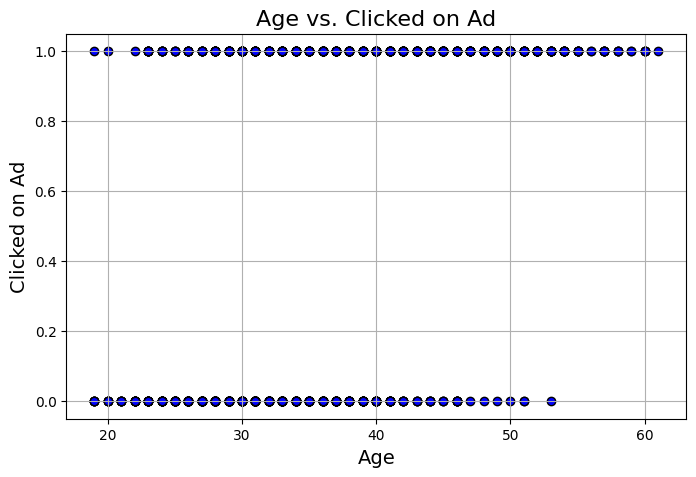

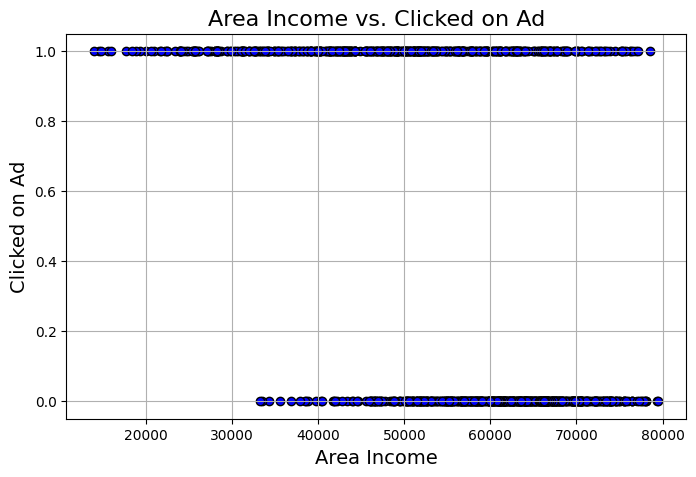

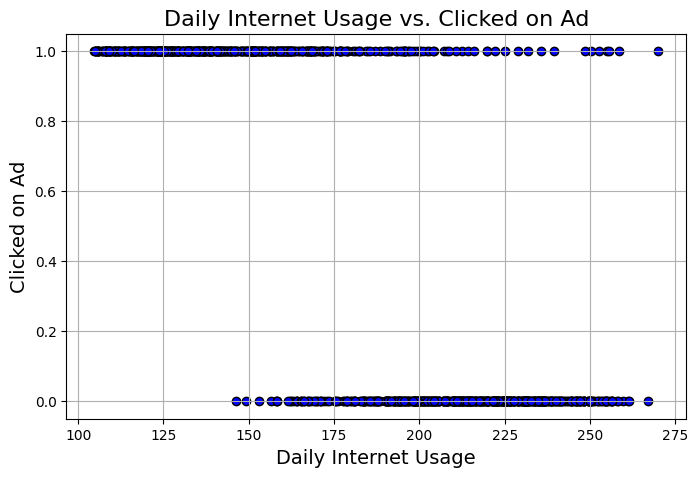

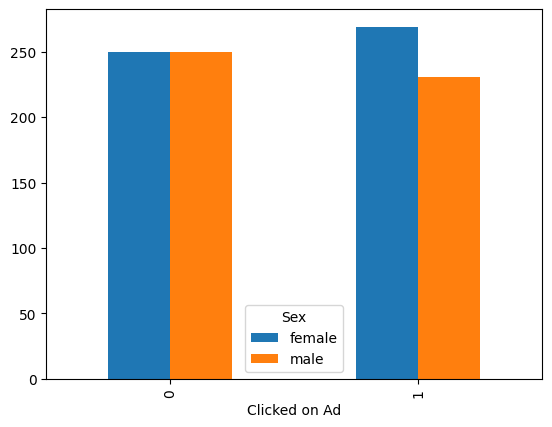

In [ ]:
for c in df.columns[1:]:
    if c == 'Daily Time Spent on Site' or c == 'Age' or c=='Area Income' or c=='Daily Internet Usage':
        plt.figure(figsize=(8,5))
        plt.title('{} vs. Clicked on Ad'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df['Clicked on Ad'], color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('Clicked on Ad', fontsize=14)
        plt.show()
    elif c == 'Sex':
        ct = pd.crosstab(df['Clicked on Ad'], df[c])
        ct.plot.bar()

Видим разнообразие в каждой подгруппе предикторов, следовательно, проблем с наличием наблюдей в уникальных подгруппах нет, значит можем их всех оставить.

<font color='red'> корреляции не проверила</font>

# Регрессия

In [ ]:
df_model1 = df.dropna(subset=['Sex_male', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])
df_model1.shape
#удаляем пропуски только по переменным, вошедшим в модель (пропусков нет)

(1000, 13)

In [ ]:
x_mult = df_model1[['Sex_male', 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']]
y = df_model1['Clicked on Ad']
x_mult_constant = sm.add_constant(x_mult)

In [ ]:
model1 = sm.Logit(y, x_mult_constant).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.090904
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Clicked on Ad   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      994
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 Dec 2024   Pseudo R-squ.:                  0.8689
Time:                        17:17:23   Log-Likelihood:                -90.904
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.136e-258
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       27.3606      2.736      9.999      0.000      21.99


Pseudo R-squared: 0.8689, что указывает на то, что модель объясняет 86.89% данных, что является хорошим показателем.

Log-Likelihood: -90.904, значение логарифма функции правдоподобия.

LLR p-value: 3.136e-258, значит модель в целом статистически значима.

Коэффициенты модели:

const: 27.3606 - положительна и значима, что указывает на высокую вероятность нажатия на рекламу при отсутствии других факторов.

Sex_male: -0.4217

Этот коэффициент показывает, что мужчины имеют меньшую вероятность нажатия на рекламу по сравнению с женщинами. Но p-value = 0.297, значит, это значение не является статистически значимым, и мы не можем утверждать, что пол оказывает значительное влияние на вероятность нажатия на рекламу, так что опровергаем гипотезу.

Daily Time Spent on Site: -0.1927

Этот коэффициент отрицательный, что означает, что с увеличением времени, проведенного на сайте, вероятность нажатия на рекламу уменьшается. P-value=0.000 указывает на высокую статистическую значимость этого коэффициента.

Age: 0.1709

Положительный коэффициент указывает на то, что с увеличением возраста вероятность нажатия на рекламу увеличивается. Это статистически значимо (p-value = 0.000), значит, возраст является важным фактором в модели.

Area Income: -0.0001

Этот коэффициент также отрицательный, что указывает на то, что с увеличением среднего дохода вероятность нажатия на рекламу немного уменьшается. Несмотря на то, что коэффициент очень маленький, он статистически значим, так как p-value = 0.000.

Daily Internet Usage: -0.0635

Этот коэффициент показывает, что с увеличением времени, проводимого в интернете, вероятность нажатия на рекламу также уменьшается. Это также статистически значимо, так как p-value = 0.000.

Подробнее будет описано ниже.

In [ ]:
coefs = pd.DataFrame()
coefs['Coefs'] = model1.params[1:]
coefs['Features'] = model1.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model1.params[0])
coefs
#отдельно выводим коэффициенты регрессии

Intercept =  27.360607620139163


,Coefs
Features,
Sex_male,-0.421677
Daily Time Spent on Site,-0.192726
Age,0.170884
Area Income,-0.000136
Daily Internet Usage,-0.063513


In [ ]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs
#коэффициенты регрессии и отношения шансов

,Coefs,OddsRatio
Features,,
Sex_male,-0.421677,0.655946
Daily Time Spent on Site,-0.192726,0.824708
Age,0.170884,1.186353
Area Income,-0.000136,0.999864
Daily Internet Usage,-0.063513,0.938462


In [ ]:
def yes_no(p_value, level = 0.05):
    if abs(p_value) < level:
        return 'significant'
    else:
        return 'non-significant'

In [ ]:
pvals = pd.DataFrame()
pvals['p_values'] = model1.pvalues[1:]
pvals['5% level']= pvals['p_values'].apply(yes_no)
pvals['p_values'] = pvals['p_values'].map('{:.3f}'.format)
pvals['Features'] = model1.params.index[1:]
pvals.set_index('Features',inplace=True)
pvals

,p_values,5% level
Features,,
Sex_male,0.297,non-significant
Daily Time Spent on Site,0.000,significant
Age,0.000,significant
Area Income,0.000,significant
Daily Internet Usage,0.000,significant


In [ ]:
pvals['10% level'] = model1.pvalues[1:].apply(lambda x: yes_no(x, level=0.1))
pvals # без изменений

,p_values,5% level,10% level
Features,,,
Sex_male,0.297,non-significant,non-significant
Daily Time Spent on Site,0.000,significant,significant
Age,0.000,significant,significant
Area Income,0.000,significant,significant
Daily Internet Usage,0.000,significant,significant


### Характеристика модели

In [ ]:
print('R^2 = {:f}'.format(model1.prsquared))
print('Model significance = {:f}'.format(model1.llr_pvalue))

R^2 = 0.868853
Model significance = 0.000000


Модель статистически значима и объясняет 87% изменчивости значений зависимой переменной.

In [ ]:
f'Статистически значимые предикторы: {model1.pvalues[model1.pvalues < 0.05].index.values}'

"Статистически значимые предикторы: ['const' 'Daily Time Spent on Site' 'Age' 'Area Income'\n 'Daily Internet Usage']"

In [ ]:
f'Статистически значимые предикторы: {model1.pvalues[model1.pvalues > 0.05].index.values}'

"Статистически значимые предикторы: ['Sex_male']"

In [ ]:
l = []
for (param, index) in zip(model1.params[1:], model1.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model1.params[0], ' + '.join(l)))

logit(p) = 27.360608 + -0.42*Sex_male + -0.19*Daily Time Spent on Site + 0.17*Age + -0.00*Area Income + -0.06*Daily Internet Usage


### Интерпретация значений коэффициентов регрессии



1. Sex_male - его значение статестически не значимо, как было написано выше.

2. Daily Time Spent on Site

Коэффициент: -0.1927

Odds Ratio: 0.8247

 Odds Ratio меньше 1 (0.8247) означает, что с каждым дополнительным часом, проведенным на сайте, вероятность нажатия на рекламу снижается на 17.53% (1 - 0.8247 = 0.1753).

3. Age

Коэффициент: 0.1709

Odds Ratio: 1.1864

Odds Ratio больше 1 (1.1864) указывает на то, что с каждым годом возраста вероятность нажатия на рекламу увеличивается на 18.64% (1.1864 - 1 = 0.1864).

4. Area Income

Коэффициент: -0.000136
Odds Ratio: 0.9999

Коэффициент близок к нулю, что указывает на незначительное влияние среднего дохода на вероятность нажатия на рекламу, как было написано ранее. Odds Ratio чуть-чуть меньше 1 (0.9999): изменение в доходе практически не влияет на вероятность нажатия на рекламу.

5. Daily Internet Usage

Коэффициент: -0.0635

Odds Ratio: 0.9385

Odds Ratio меньше 1 (0.9385) указывает на то, что с каждым дополнительным часом интернет-использования вероятность нажатия на рекламу снижается на 6.15% (1 - 0.9385 = 0.0615).


### Матрица ошибок

In [ ]:
cm = model1.pred_table()
cm # 491 кликнули и мы предсказали, что они кликнут, 481 не кликнули и мы предсказали, что они не кликнут

array([[491.,   9.],
       [ 19., 481.]])

In [ ]:
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 491.0 | FN: 9.0
-------------------
FP: 19.0  | TN: 481.0


In [ ]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Точность (процент верно предсказанных событий): = {}'.format(accuracy)) # 97% точность

Точность (процент верно предсказанных событий): = 0.972


### ROC-curve

In [ ]:
fpr, tpr, _ = roc_curve(df_model1['Clicked on Ad'], model1.predict())
roc_auc = auc(fpr, tpr)

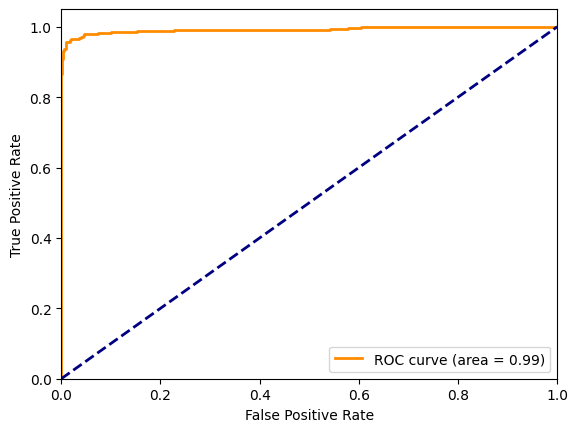

In [ ]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show() # кривая очень близка к левому верхнему углу, площадь под ней - 0.99 - очень хороший результат

# Диагностика модели

### Остатки

In [ ]:
p = stats.kstest(model1.resid_generalized, 'norm', args=(model1.resid_generalized.mean(), model1.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


<Axes: ylabel='Density'>

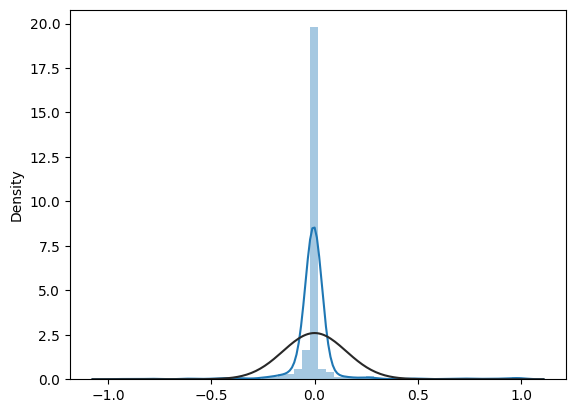

In [ ]:
sns.distplot(model1.resid_generalized, fit=stats.norm)

Распределение остатков не нормально и отличается пиковостью.

### Мультиколлинеарность

In [ ]:
vifs = np.array([vif(model1.model.exog, i) for i in range(model1.model.exog.shape[1])])

In [ ]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model1.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
0,1.002687,Sex_male
3,1.163379,Area Income
2,1.195578,Age
1,1.451917,Daily Time Spent on Site
4,1.517298,Daily Internet Usage


Нет значений VIF, превышающих 10. Проблема мультиколлинеарности отсутствует.

### Сохранение предсказанной вероятности наступления события для каждого наблюдения

In [ ]:
df_model1['probability'] = model1.predict()
df_model1 # можем посмотреть на конкретные случаи и вероятность нажатия этих людей на рекламу

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Sex,Sex_female,Sex_male,probability
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,female,1,0,0.009697
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,male,0,1,0.007795
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,female,1,0,0.008651
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,male,0,1,0.004189
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,female,1,0,0.014526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,male,0,1,0.006970
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,male,0,1,0.999071
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,male,0,1,0.999995
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,female,1,0,0.905486


# Кросс-валидация

Разделим данные на обучающую и тестовую выборки в пропорции 80% и 20% соответственно.

In [ ]:
!pip3 install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [ ]:
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_mult, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 94.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.926650    0.966752   0.94625    0.946701      0.947102
recall       0.966837    0.926471   0.94625    0.946654      0.946250
f1-score     0.946317    0.946183   0.94625    0.946250      0.946249
support    392.000000  408.000000   0.94625  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[379  13]
 [ 30 378]]



Получим, что модель имеет достаточно высокую точность (Accuracy Score: 94.62%).

Precision: из всех предсказанных случаев "не кликнул" 92.67% были действительно "не кликнули", и из всех предсказанных случаев "кликнул" 96.68% были действительно "кликнули".

Recall: модель верно предсказала 96.68% из всех действительно "не кликнувших" случаев и 92.65% из всех действительно "кликнувших" случаев.

F1-score: F1-мера (гармоническое среднее) близка к 0.95 для обоих значений.

Support: 392 случая не кликнули, и 408 случаев кликнули.

Матрица ошибок:

379 - TP
13 - FP

30 - FN
378 - TN

In [ ]:
pred = lr.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))

print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 94.50%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.936937   0.955056     0.945    0.945997      0.945272
recall       0.962963   0.923913     0.945    0.943438      0.945000
f1-score     0.949772   0.939227     0.945    0.944499      0.944921
support    108.000000  92.000000     0.945  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[104   4]
 [  7  85]]




Результаты тестовой выборки

Precision: из всех предсказанных "не кликнувших" 93.7% действительно не кликнули, а из всех предсказанных "кликнувших" 95.5% действительно кликнули.

Recall: модель правильно предсказала 96.3% всех случаев, где пользователь не кликнул, и 92.4% всех случаев, где пользователь кликнул.

F1-score: F1-мера также составляет приблизительно 0.95 для обоих значений.

Support: Количество наблюдений в каждом классе: 108 - не кликнули, 92 - кликнули.

Матрица ошибок:

104 - TP
4 - FP

7 - FN
85 - TN

Результаты показывают, что модель достаточно надежна для предсказания кликов на рекламу, хотя небольшое количество ошибок все же присутствует.

Общие выводы:

Нажатие на рекламу не зависит от пола человека.

Более старшие пользователи более склонны нажимать на рекламу.

Средний доход не оказывает значимого влияния на вероятность нажатия на рекламу.

С увеличением времени, проведенного в интернете, вероятность нажатия на рекламу также немного снижается, что оказалось неожиданным и опровергнуло гипотезу.